Creating a linear regression model to predict the salaries of new hires from the data which is provided.

So here we first install the needed libraries to perform the task.

In [73]:
# installing the needed libraries

In [74]:

pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [76]:
pip  install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [77]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')


Here, loading the data which is in the form of Excel so we read it by using the PD.read_excel. In order to remove the two rows of the data  which have blank rows and cloumns data so we had a header is equal two and index column is equal zero so, the data pefectly fits in the table.

In [78]:
# loading the data set using the pd.read_excel
df = pd.read_excel('projects/traindata.xlsx', header = 2,index_col = 0)

In [79]:
df

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...
1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686


In [80]:
df.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [81]:
df.tail()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686
1337,Tier 1,Executive,Non-Metro,53203,3,69,21,64044.382949
1338,Tier 3,Manager,Non-Metro,51820,1,47,61,83346.060961


For understanding the data we use info shape and describe functions to get a better understanding about the date of which was given.

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 94.1+ KB


The data has 1338 columns and eight rows.

In [83]:
df.shape

(1338, 8)

 Describing the data, Here we can see the mean , std ,min , quartile range .. etc 

In [84]:

df.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


checking the data if it has the null values.

In [85]:
df.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

Exploratory Data Analysis

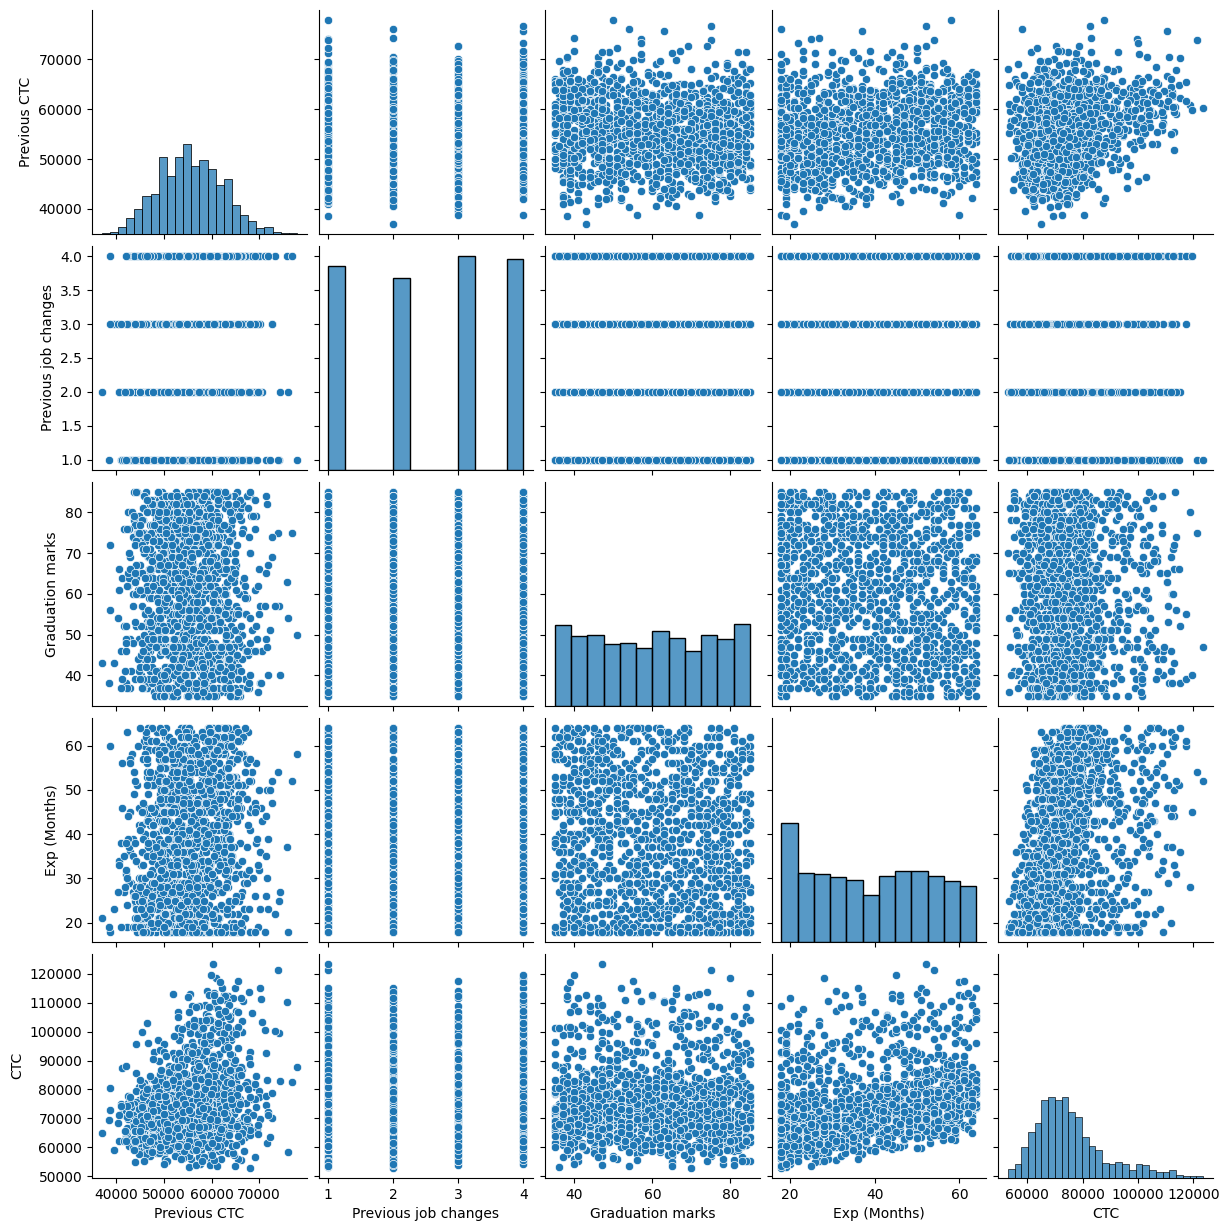

In [86]:
# understanding the data using the pairplot function 
sns.pairplot(df)

Here we visualise the data using the heat map to get a numerical understanding of the data in a simple way. here i used the coolwarm which I like the most.

<AxesSubplot:>

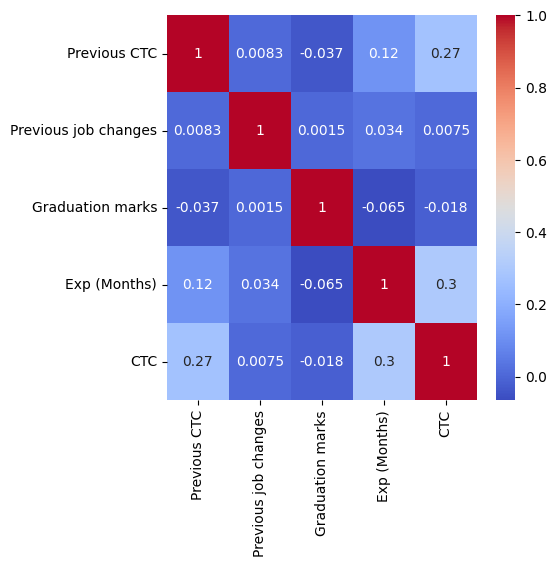

In [87]:
# Visualising the data using the heatmap
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

From the above heatmap we can understand that the previous CTC and the CTC had a little bit of correlation.

Using the sns.distplot  function, we can have a histogram illustrates the CTC is normally distributed.

<AxesSubplot:xlabel='CTC', ylabel='Density'>

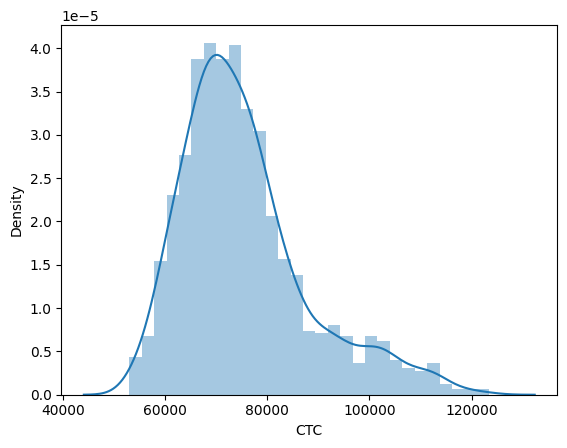

In [88]:
sns.distplot(df['CTC'])

After understanding the preliminary dataset which was given so I load the second dataset which was the actual data to test and to predict the predicted CTC.

In [91]:
# loading the actual data set , which is to be tested 
data = pd.read_csv('projects/actualdata.csv')

In [92]:
data

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
data.columns

Index(['College', 'Role', 'City type', 'College_T1', 'College_T2',
       'Role_Manager', 'City_Metro', 'previous CTC', 'previous job changes',
       'Graduation marks', 'Exp', 'Actual CTC', 'Predicted CTC', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [94]:
# dropping out the unwanted and nan columns from the data
data.drop(data.columns[14:23], axis = 1, inplace = True)
data

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC,Unnamed: 13,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.57653,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.87063,NaN,NaN,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.02028,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.38688,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.09773,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Tier 3,Executive,Metro,0,0,0,1,59661,4,68,50,69712.40366,NaN,NaN,NaN
1334,Tier 1,Executive,Non-Metro,1,0,0,0,53714,1,67,18,69298.75010,NaN,NaN,NaN
1335,Tier 2,Executive,Non-Metro,0,1,0,0,61957,1,47,18,66397.77069,NaN,NaN,NaN
1336,Tier 1,Executive,Non-Metro,1,0,0,0,53203,3,69,21,64044.38295,NaN,NaN,NaN


In [95]:
# deleting the Role , college , citytype , unnamed 13 and 23
del data['Role']



In [96]:
del data['College']

In [97]:
del data['Unnamed: 13']

In [98]:
del data['Unnamed: 23']

In [99]:
del data['City type']

In [100]:
# here is final data 
data–

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.57653,NaN
1,0,1,0,1,57081,1,84,18,68005.87063,NaN
2,0,1,0,1,60347,2,52,28,76764.02028,NaN
3,0,0,0,1,49010,2,81,33,82092.38688,NaN
4,0,0,0,1,57879,4,74,32,73878.09773,NaN
...,...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,59661,4,68,50,69712.40366,NaN
1334,1,0,0,0,53714,1,67,18,69298.75010,NaN
1335,0,1,0,0,61957,1,47,18,66397.77069,NaN
1336,1,0,0,0,53203,3,69,21,64044.38295,NaN


Call preparation for the linear regression we use X and Y  where  Y is a targeted variable X which is compare with the targeted variable, which were taken from the test data.

In [101]:
x = data[['College_T1','College_T2','Role_Manager','City_Metro','previous CTC','previous job changes','Graduation marks','Exp']]
y = data['Actual CTC']

Training the data using the train_test_split function from sklearn libraray, we perform the linear regresssion model.

In [102]:
 x_train, x_test, y_train , t_test = train_test_split(x,y,train_size=0.7,test_size=0.3, random_state=100)

In [103]:
# fitting model using the linear regression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [104]:
# predicting the model
prediction = lr.predict(x)
data['Predicted CTC'] = prediction
data

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.57653,86154.087015
1,0,1,0,1,57081,1,84,18,68005.87063,65964.465999
2,0,1,0,1,60347,2,52,28,76764.02028,70093.327155
3,0,0,0,1,49010,2,81,33,82092.38688,66823.386382
4,0,0,0,1,57879,4,74,32,73878.09773,70154.447253
...,...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,59661,4,68,50,69712.40366,75603.101387
1334,1,0,0,0,53714,1,67,18,69298.75010,65752.205899
1335,0,1,0,0,61957,1,47,18,66397.77069,64133.780333
1336,1,0,0,0,53203,3,69,21,64044.38295,66239.384929


In [105]:
# here are the predicted values of the CTC
data['Predicted CTC']

0       86154.087015
1       65964.465999
2       70093.327155
3       66823.386382
4       70154.447253
            ...     
1333    75603.101387
1334    65752.205899
1335    64133.780333
1336    66239.384929
1337    90912.139022
Name: Predicted CTC, Length: 1338, dtype: float64

Finally to understand a linear regression between actual data and predicted data we use lmplot function.
Here I plotted a graph using seaborn where it shows a staright line fits between the Predictor CTC and the actual CTC.

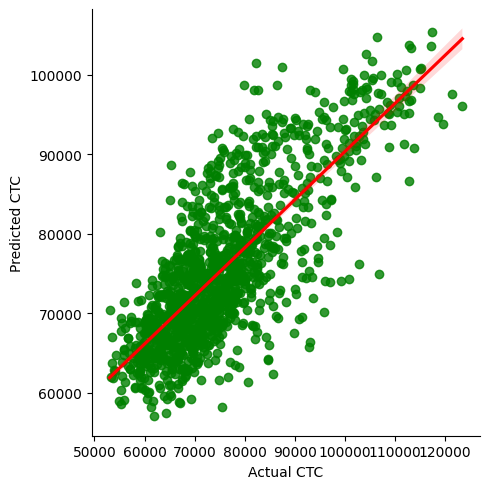

In [106]:
sns.lmplot(x='Actual CTC', y= 'Predicted CTC' , data = data, scatter_kws={'color':'green'}, line_kws={'color':'red'})

In [107]:
print('Mean square Value:' , metrics.mean_squared_error(y,prediction))

Mean square Value: 61786645.2473197


In [108]:
print('Root Mean Square Value:',np.sqrt(metrics.mean_squared_error(y,prediction)))

Root Mean Square Value: 7860.448158172643


So finally here is the answer of the task which was given is the predicted CTC/salary.

In [109]:
data['Predicted CTC']

0       86154.087015
1       65964.465999
2       70093.327155
3       66823.386382
4       70154.447253
            ...     
1333    75603.101387
1334    65752.205899
1335    64133.780333
1336    66239.384929
1337    90912.139022
Name: Predicted CTC, Length: 1338, dtype: float64